<a href="https://colab.research.google.com/github/efecantepe/IE423/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

from keras.datasets import fashion_mnist
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv')
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

### Checking For Missing Values

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### Checking Unique Valuee

In [ ]:
unique_values = df.nunique()
print(unique_values)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


### Checking Data Types

In [ ]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

## Enumarating Categorical Data

In [ ]:
df['Revenue'] = df['Revenue'].astype(int)


## Explanatory Data Analysis

In [ ]:
categorical_columns = ['Month', 'VisitorType']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_Feb  \
0         0.200000   0.200000    0.000000         0.0  ...       True   
1         0.000000   0.100000    0.000000         0.0  ...       True   
2         0.200000   0.200000    0.000000         0.0  ...       True   
3         0.050000   0.140000    0.000000         0.0  ...       True   
4         0.020000   0.050000    0.000000         0.0  ...       True   
...            ...        ...         ...         ...  ...        ...   
12325     0.007143   0.029031   12.241717         0.0  ...      False   
12326     0.000000   0.021333    0.000000         0.0  ...      False   
12327     0.083333   0.086667    0.000000         0.0  ...      False   
12328     0.000000   0.021053    0.000000         0.0  ...      False   
12329     0.000000   0.066667    0.000000         0.0  ...      False   

       Month_Jul  Month_June  Month_Mar  Month_May  Month_Nov  Month_Oct  \
0          False       False      False      False      False      False   
1          False       False      False      False      False      False   
2          False       False      False      False      False      False   
3          False       False      False      False      False      False   
4          False       False      False      False      False      False   
...          ...         ...        ...        ...        ...        ...   
12325      False       False      False      False      False      False   
12326      False       False      False      False       True      False   
12327      False       False      False      False       True      False   
12328      False       False      False      False       True      False   
12329      False       False      False      False       True      False   

       Month_Sep  VisitorType_Other  VisitorType_Returning_Visitor  
0          False              False                           True  
1          False              False                           True  
2          False              False                           True  
3          False              False                           True  
4          False              False                           True  
...          ...                ...                            ...  
12325      False              False                           Tr

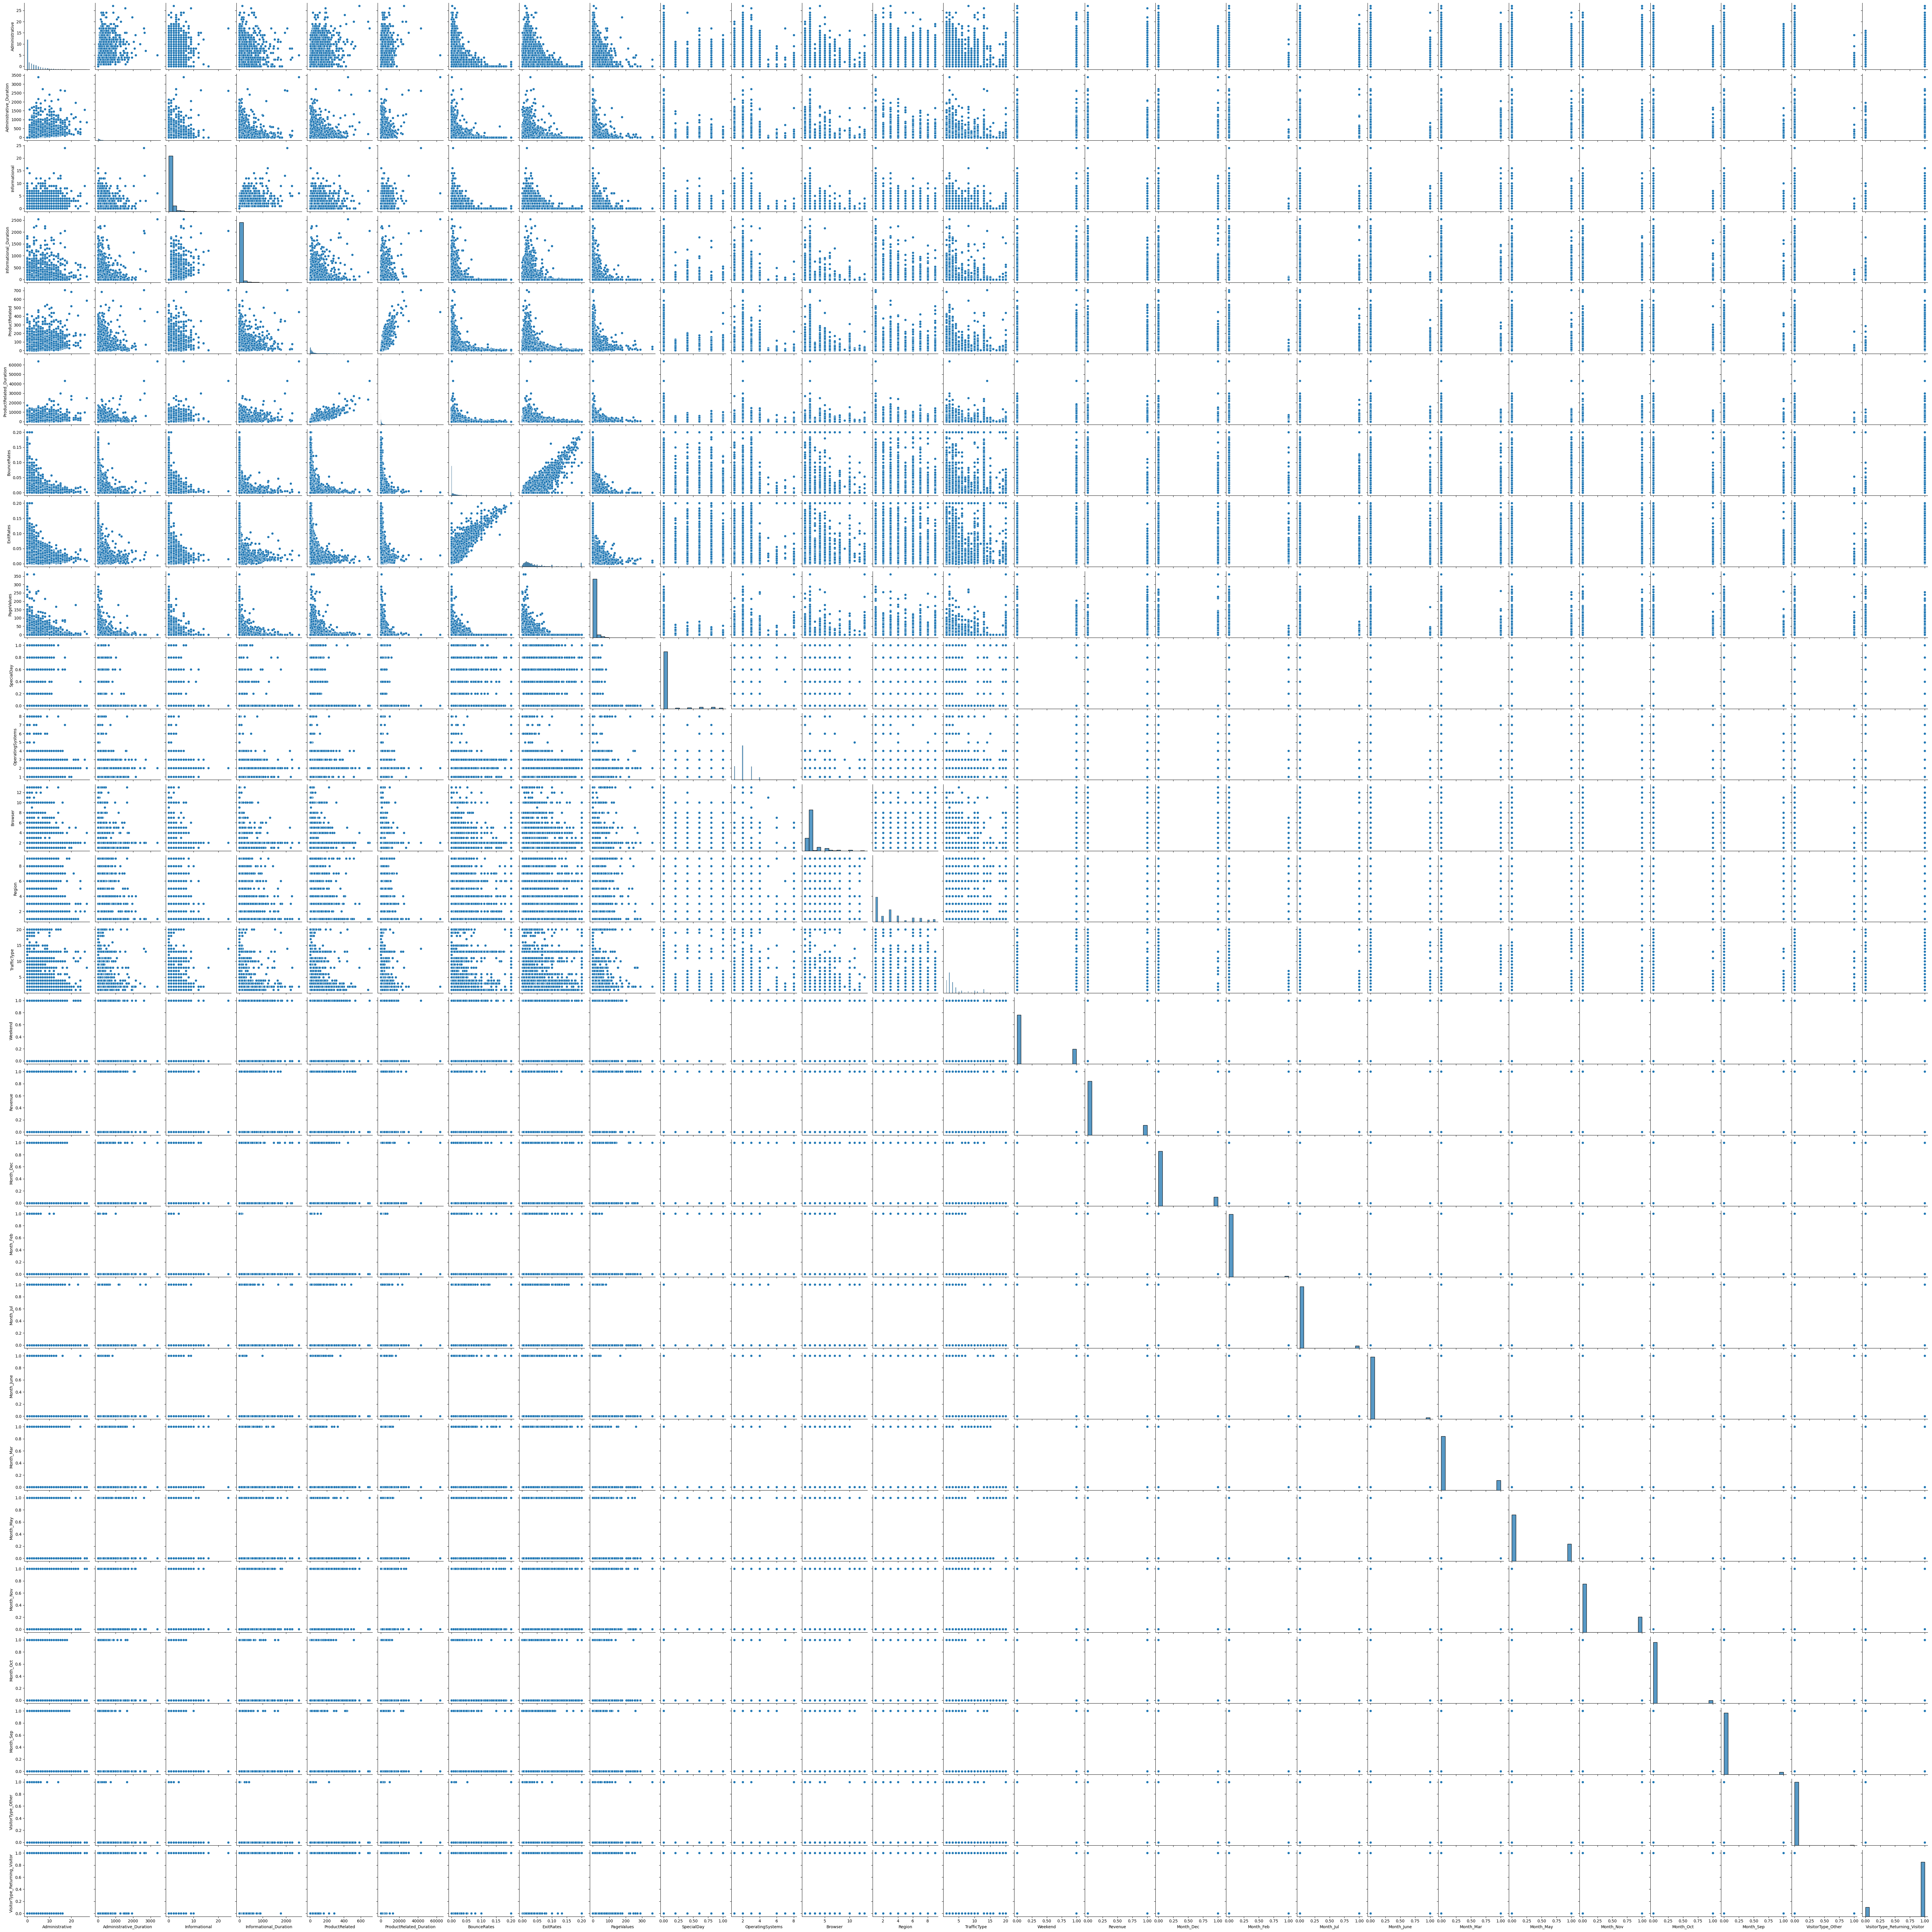

In [ ]:
sns.pairplot(df)

#### Visualizing the distribution of numerical features

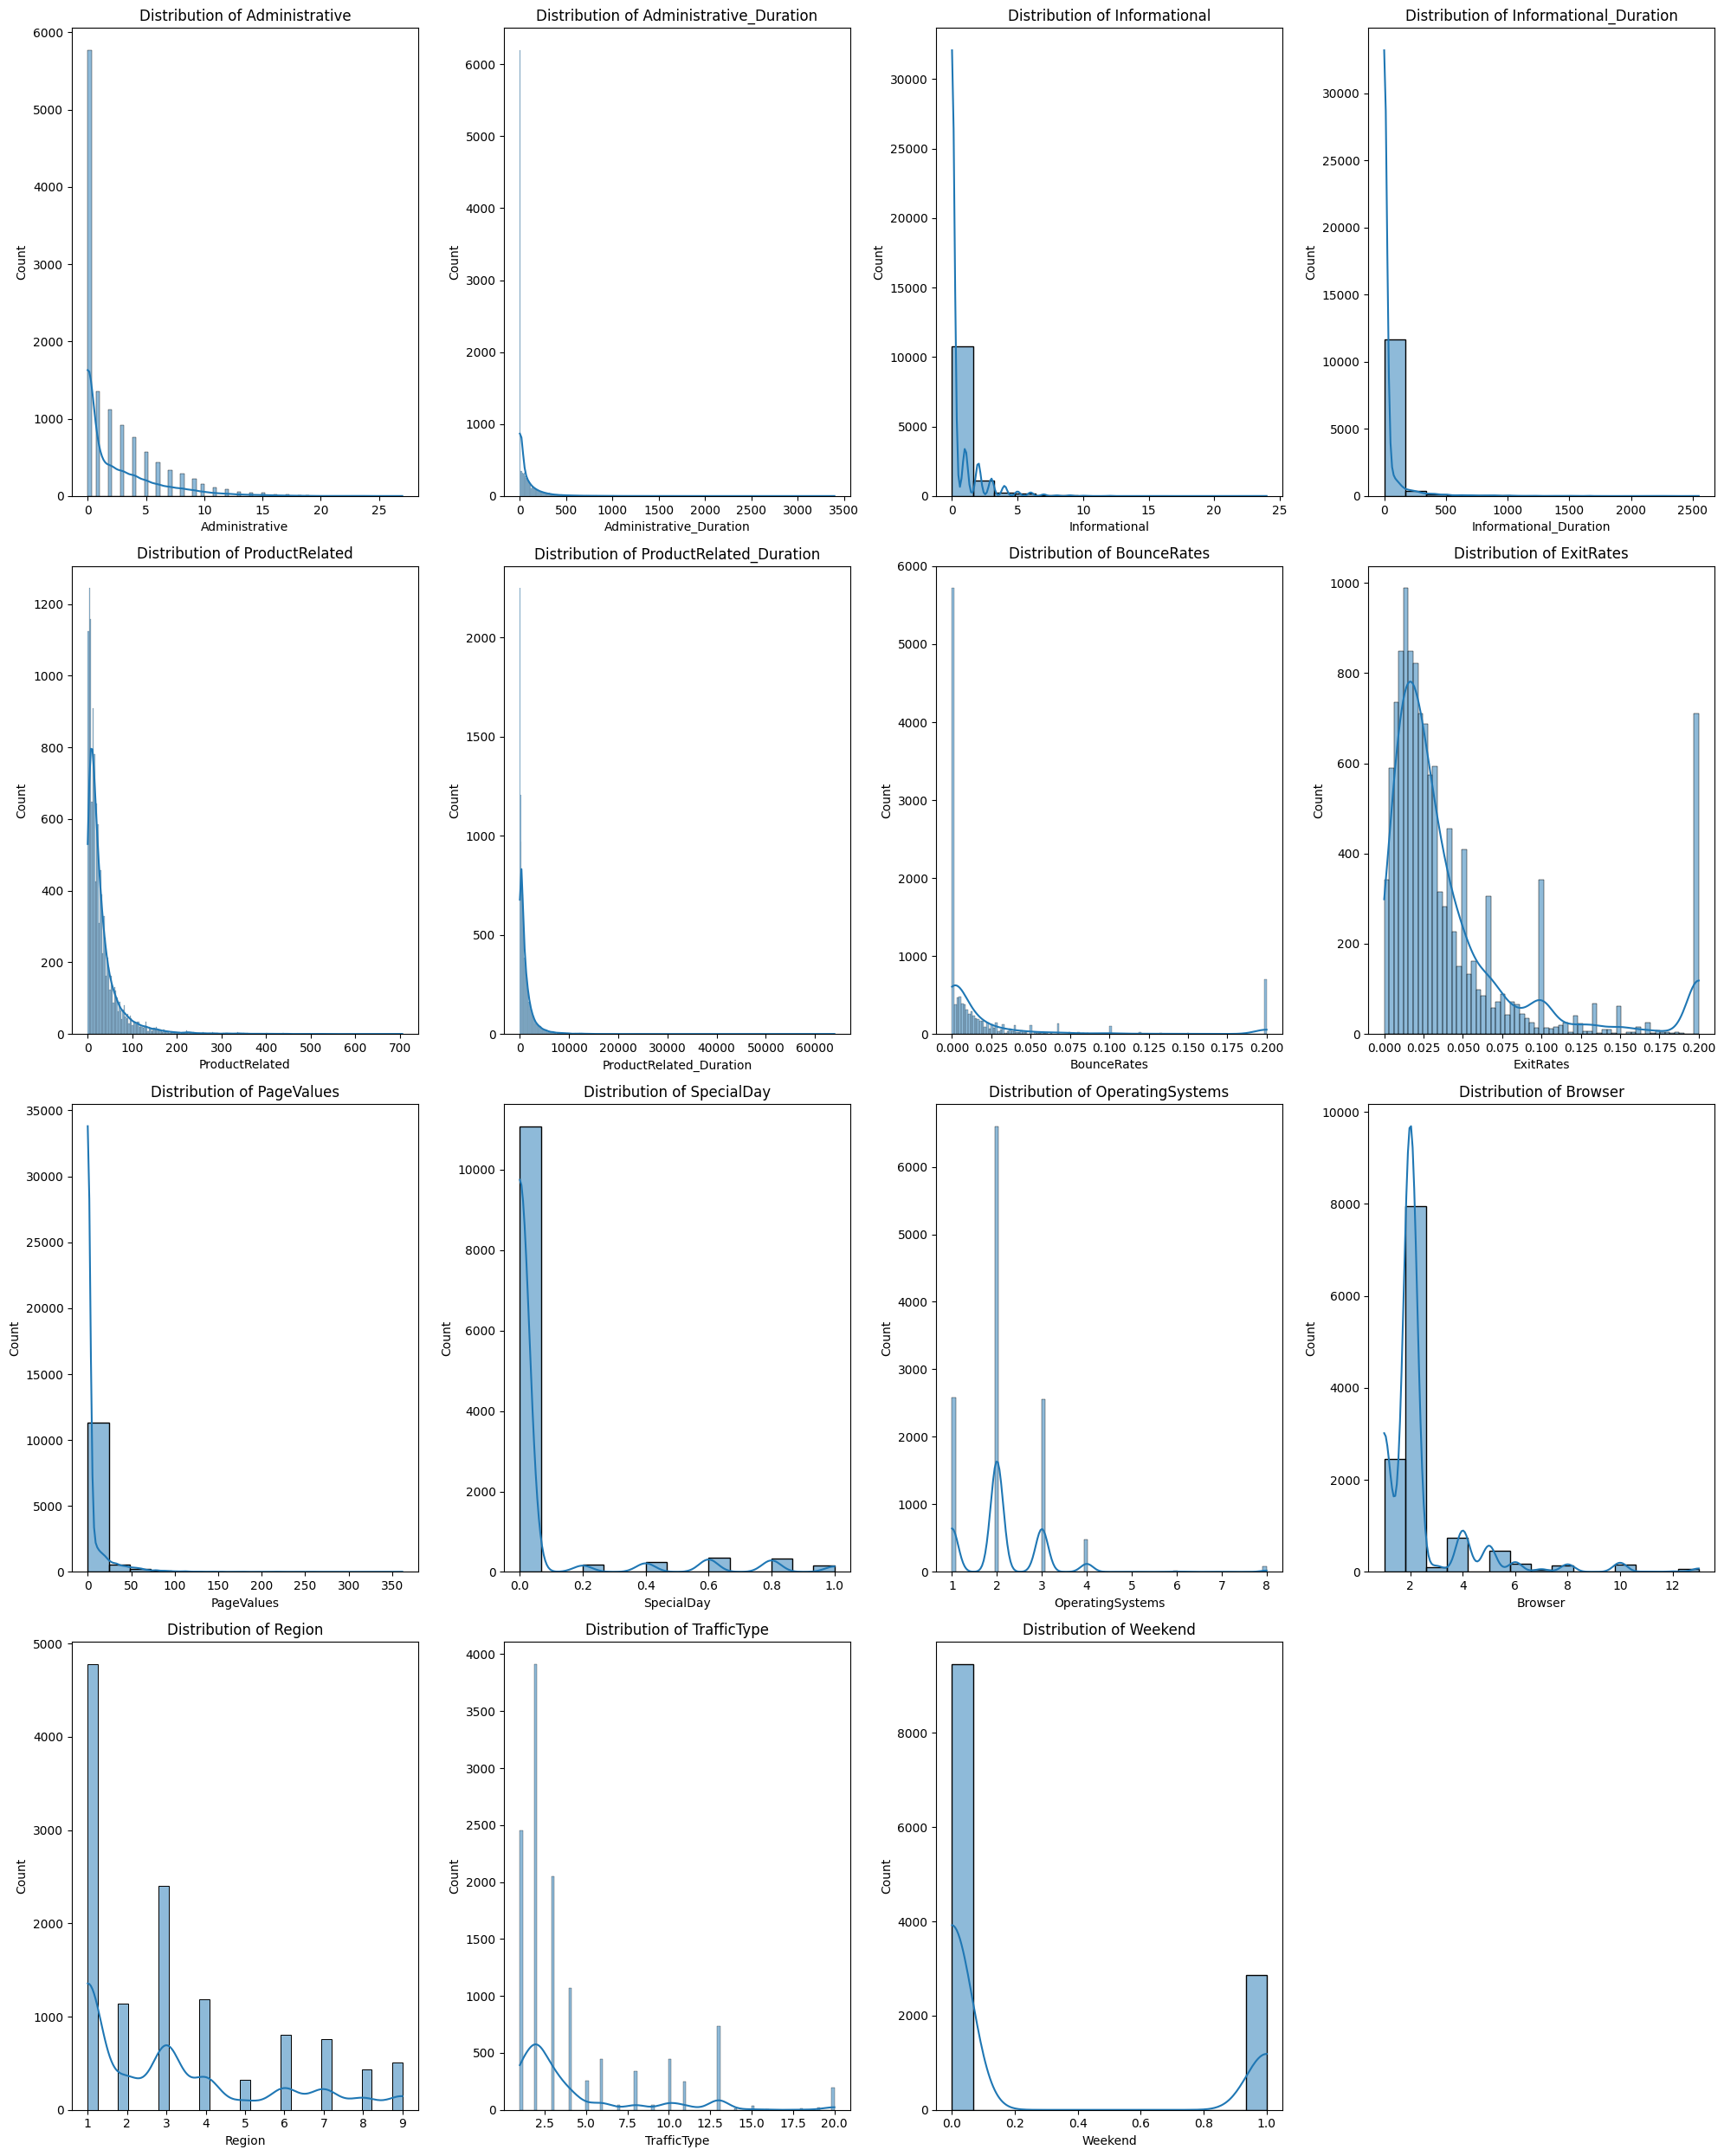

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ["Administrative", "Administrative_Duration",
                      "Informational", "Informational_Duration",
                      "ProductRelated", "ProductRelated_Duration",
                      "BounceRates", "ExitRates", "PageValues", "SpecialDay", "OperatingSystems",
                      "Browser", "Region", "TrafficType", "Weekend"]

plt.figure(figsize=(20, 25))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)  # Changed to a 4x4 grid
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()




Adminstrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration are related information about visitors page sessions and durations. We can calculate the mean of the each value with the below code block


In [ ]:
mean_values = df[["Administrative", "Administrative_Duration",
                  "Informational", "Informational_Duration",
                  "ProductRelated", "ProductRelated_Duration"]].mean()

print(mean_values)

Administrative                2.315166
Administrative_Duration      80.818611
Informational                 0.503569
Informational_Duration       34.472398
ProductRelated               31.731468
ProductRelated_Duration    1194.746220
dtype: float64


We can see from this code block people spent most time in ProductRelated_Duration and then Administrative_Duration and then finally Informational_Duration.

It is an interesting insight about the habits of the user. It is expected the ProductRelated_Duration is the most time spended. On the other hand Administrative_Duration is bigger then Informational_Duration.

Although it is a bit speculative, websites aim is a purchase. Easier to use website generates better user experience and eventually yiels higher probability of user purchase. So maybe coming up with better User Experience for the website can decrease the Administrative_Duration and can lead customer to buy our product.

#### Box Plots for relationship between target and numerical features

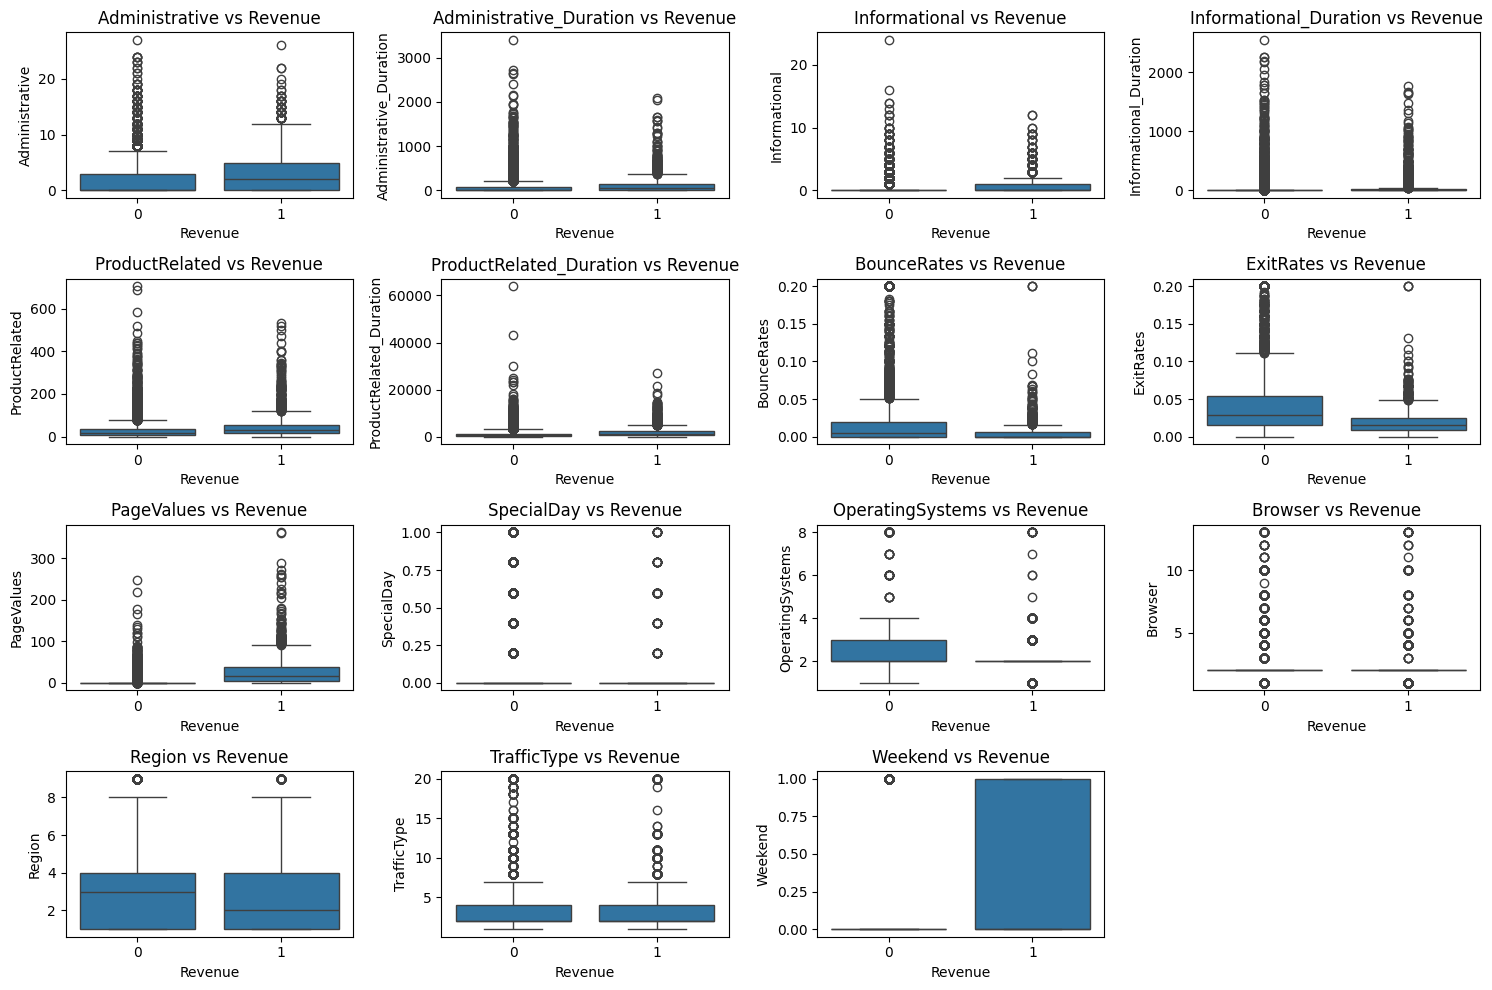

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='Revenue', y=feature, data=df)
    plt.title(f'{feature} vs Revenue')
plt.tight_layout()
plt.show()

* We can see the when Administrative_Duration is high no purchasing occurs
* We can see in the other duration related section same trends occur. Lesser duration time has effect on purchasing.
* For the above 2 two insight we can simply look the median line which is in the below part of the interquartile range
* For the BounceRates we can see that user preffered not bouncing regardless of purchasing or not. However, we can see that purchasing operation interquartile range is closer to 0 when the value is True. Bouncing negatively effects the purchasing.
* ExitRates have similar graph. When the Revenue is True, interquartile range tends to be closer to 0
* In the PageValues, we can see that when the Revenue value is True, it page count tends to increase. So we can argue that people who are not going to buy the product do not visits different web pages. Making the websites more appealing might increase the overall consumptions of the user since it will ultimately make user wants to click the website.
* For the Region vs Revenue diagram, we can argue that Regions 1 and 2 purchase more than other regions since their mean line is closer to 0.
* For Special Day, OperatingSystems, Browser, TrafficType box diagram does not offer much information.

### Feature Engineering

#### For the feature engineering I will create ... additional columns.

* Total_Time: For all the durations (Administrative_Duration, Informational_Duration,ProductRelated_Duration) I will calculate the total duration of each session since their respective time might be less effective to the purchasing habits. For that comparision we also need to total time column.
* Total_Page: For all pages (Administrative, Informational, ProductRelated) I will calculate the Total Number of pages similar the Total_Time


From below code you can see the additons.


In [ ]:
df['Total_Time'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Page'] = df['Administrative'] + df['Informational'] + df['ProductRelated']

df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  ...  Month_June  \
0         0.200000   0.200000    0.000000         0.0  ...       False   
1         0.000000   0.100000    0.000000         0.0  ...       False   
2         0.200000   0.200000    0.000000         0.0  ...       False   
3         0.050000   0.140000    0.000000         0.0  ...       False   
4         0.020000   0.050000    0.000000         0.0  ...       False   
...            ...        ...         ...         ...  ...         ...   
12325     0.007143   0.029031   12.241717         0.0  ...       False   
12326     0.000000   0.021333    0.000000         0.0  ...       False   
12327     0.083333   0.086667    0.000000         0.0  ...       False   
12328     0.000000   0.021053    0.000000         0.0  ...       False   
12329     0.000000   0.066667    0.000000         0.0  ...       False   

       Month_Mar  Month_May  Month_Nov  Month_Oct  Month_Sep  \
0          False      False      False      False      False   
1          False      False      False      False      False   
2          False      False      False      False      False   
3          False      False      False      False      False   
4          False      False      False      False      False   
...          ...        ...        ...        ...        ...   
12325      False      False      False      False      False   
12326      False      False       True      False      False   
12327      False      False       True      False      False   
12328      False      False       True      False      False   
12329      False      False       True      False      False   

       VisitorType_Other  VisitorType_Returning_Visitor   Total_Time  \
0                  False                           True     0.000000   
1                  False                           True    64.000000   
2                  False                           True     0.000000   
3                  False                           True     2.666667   
4                  False                           True   627.500000   
...                  ...                            ...          ...   
12325              False                           True  1928.791667   
12326              False                           True   465.750000   
12327              False       

## Correlation Matrix

In [ ]:
corr_matrix = df.corr()

corr_target = corr_matrix['Revenue'].abs()

top_features = corr_target[corr_target > 0.05].index

top_corr_matrix = df[top_features].corr()

top_features



Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue',
       'Month_Mar', 'Month_May', 'Month_Nov', 'VisitorType_Returning_Visitor',
       'Total_Time', 'Total_Page'],
      dtype='object')

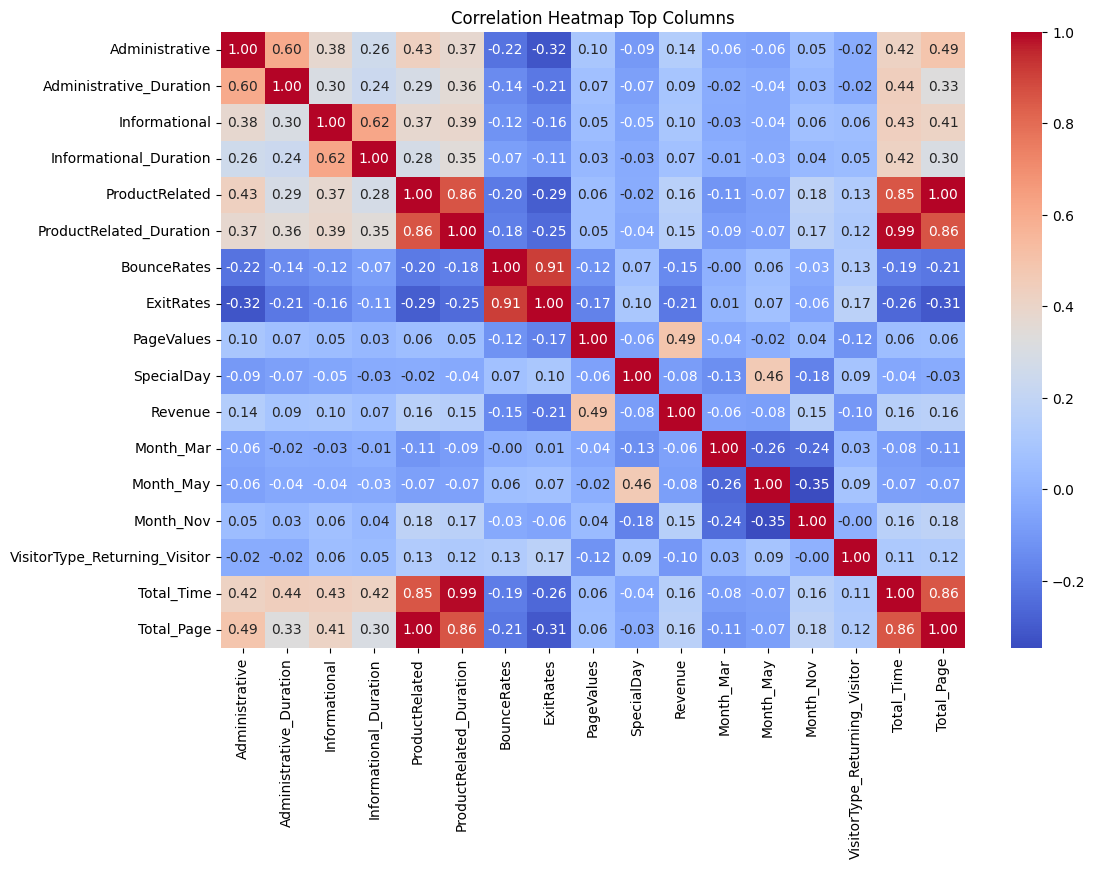

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Top Columns')
plt.show()

## Model Building

### Random Forrest

In [ ]:
y = df.loc[: ,["Revenue"]] # Target
x = df.drop(["Revenue"], axis=1) # Values

Xnum_train, Xnum_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Function for building and scoring Random Forest models
def get_random_forest_mae(X_trn, X_tst, y_trn, y_tst):
    mdlRfsMlb = RandomForestRegressor(random_state=1)
    mdlRfsMlb.fit(X_trn, y_trn)
    y_tst_prd = mdlRfsMlb.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return mae


mae = get_random_forest_mae(Xnum_train, Xnum_test, y_train, y_test)
print(f'Mean Absolute Error: {mae}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.13432684509326845


### Cat Boost

In [ ]:
!pip install catboost==1.2.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor


# Define your feature and target variables
y = df.loc[:, ["Revenue"]]  # Target
x = df.drop(["Revenue"], axis=1)  # Features



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

# Function for building and scoring CatBoost models
def get_catboost_mae(X_trn, X_tst, y_trn, y_tst):
    mdlCatBoost = CatBoostRegressor(random_state=1, silent=True)
    mdlCatBoost.fit(X_trn, y_trn)
    y_tst_prd = mdlCatBoost.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return mae

# Calculate Mean Absolute Error for the CatBoost model
mae = get_catboost_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.13937990613330073


#### Hyper Parameter Tuning Of Cat Boost

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)


param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10]
}

catboost = CatBoostRegressor(random_state=1, silent=True)

grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Mean Absolute Error: {mae}')


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'depth': 6, 'iterations': 300, 'learning_rate': 0.05}
Mean Absolute Error: 0.1359870152661052


### Gradient Tree Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_gb_mae(X_trn, X_tst, y_trn, y_tst):
    mdlGB = GradientBoostingRegressor(random_state=1)
    mdlGB.fit(X_trn, y_trn.values.ravel())
    y_tst_prd = mdlGB.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return mae

mae = get_gb_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.1388552384525497


### Hyper Paramter Gradient Tree Boosting

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np



df['Revenue'] = df['Revenue'].astype(int)

y = df.loc[:, ["Revenue"]]  # Target
x = df.drop(["Revenue"], axis=1)  # Features

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 3, 4]
}

gb = GradientBoostingRegressor(random_state=1)

random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, n_iter=50, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1, random_state=1)

random_search.fit(X_train, y_train.values.ravel())

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'Best parameters found: {best_params}')
print(f'Mean Absolute Error with best parameters: {mae}')



Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 6, 'learning_rate': 0.05}
Mean Absolute Error with best parameters: 0.13388662035310472


## Support Vector Regression

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_svr_mae(X_trn, X_tst, y_trn, y_tst):
    mdlSVR = SVR()
    mdlSVR.fit(X_trn, y_trn.values.ravel())
    y_tst_prd = mdlSVR.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return mae

mae = get_svr_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error with SVR: {mae}')


Mean Absolute Error with SVR: 0.20596610948863395


## Ridge Regression

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_ridge_mae(X_trn, X_tst, y_trn, y_tst):
    mdlRidge = Ridge()  # You can specify parameters here if needed
    mdlRidge.fit(X_trn, y_trn.values.ravel())
    y_tst_prd = mdlRidge.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return mae

mae = get_ridge_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error with Ridge Regression: {mae}')


Mean Absolute Error with Ridge Regression: 0.19362279638655572


## Lasso Regression

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_lasso_mae(X_trn, X_tst, y_trn, y_tst):

    mdlLasso = Lasso()
    mdlLasso.fit(X_trn, y_trn.values.ravel())
    y_tst_prd = mdlLasso.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return mae

mae = get_lasso_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error with Lasso Regression: {mae}')


Mean Absolute Error with Lasso Regression: 0.21009215501812206


### Parameter Tuning for finding the best alpha value

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_best_lasso_mae(X_trn, X_tst, y_trn, y_tst):
    param_grid = {
        'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]  # You can adjust these values as needed
    }

    lasso = Lasso()

    grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

    grid_search.fit(X_trn, y_trn.values.ravel())

    best_lasso = grid_search.best_estimator_
    best_alpha = grid_search.best_params_['alpha']

    y_tst_prd = best_lasso.predict(X_tst)

    mae = mean_absolute_error(y_tst, y_tst_prd)

    return best_alpha, mae

best_alpha, mae = get_best_lasso_mae(X_train, X_test, y_train, y_test)
print(f'Best Alpha with Lasso Regression: {best_alpha}')
print(f'Mean Absolute Error with Best Alpha: {mae}')


Best Alpha with Lasso Regression: 0.1
Mean Absolute Error with Best Alpha: 0.19697377520946377


## Decision Tree

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_best_decision_tree_mae(X_trn, X_tst, y_trn, y_tst):
    param_grid = {
        'max_depth': [None, 10, 20, 30, 40, 50]  # You can adjust these values as needed
    }

    decision_tree = DecisionTreeRegressor(random_state=1)

    grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

    grid_search.fit(X_trn, y_trn.values.ravel())

    best_tree = grid_search.best_estimator_
    best_max_depth = grid_search.best_params_['max_depth']

    y_tst_prd = best_tree.predict(X_tst)

    mae = mean_absolute_error(y_tst, y_tst_prd)

    return best_max_depth, mae

best_max_depth, mae = get_best_decision_tree_mae(X_train, X_test, y_train, y_test)
print(f'Best Max Depth with Decision Tree: {best_max_depth}')
print(f'Mean Absolute Error with Best Max Depth: {mae}')


Best Max Depth with Decision Tree: 10
Mean Absolute Error with Best Max Depth: 0.1312817972323413


# Cross Validation

For the each of the models we can apply cross validation to have better precision.

## Random Forrest

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)
def get_random_forest_mae(X_trn, X_tst, y_trn, y_tst):
    mdlRfs = RandomForestRegressor(random_state=1)
    cv_scores = cross_val_score(mdlRfs, X_trn, y_trn.values.ravel(), cv=5, scoring='neg_mean_absolute_error')
    print(f'Cross-Validation Scores: {-cv_scores}')
    print(f'Mean CV Score: {-np.mean(cv_scores)}')
    mdlRfs.fit(X_trn, y_trn)
    y_tst_prd = mdlRfs.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return mae

mae = get_random_forest_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')


Cross-Validation Scores: [0.144222   0.1373036  0.14003548 0.14359351 0.14591785]
Mean CV Score: 0.1422144873644094


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error on Test Set: 0.13432684509326845


I used 5 estimatator in my function. In the first Random Forrest we had the value 0.1343. Now we have 0.1422. Which shows the importance of the cross validation for understanding. Althouh our model is perform slightly better in the set. We should always do cross validation for better understanding.

## Cat Boost

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from catboost import CatBoostRegressor
import numpy as np

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_catboost_mae(X_trn, X_tst, y_trn, y_tst):
    mdlCatBoost = CatBoostRegressor(random_state=1, silent=True)

    cv_scores = cross_val_score(mdlCatBoost, X_trn, y_trn.values.ravel(), cv=5, scoring=make_scorer(mean_absolute_error))

    print(f'Cross-Validation Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores)}')

    mdlCatBoost.fit(X_trn, y_trn)

    y_tst_prd = mdlCatBoost.predict(X_tst)

    mae = mean_absolute_error(y_tst, y_tst_prd)

    return mae

mae = get_catboost_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')


Cross-Validation Scores: [0.1498679  0.14228086 0.1429928  0.14762017 0.14848067]
Mean CV Score: 0.14624848148143307
Mean Absolute Error on Test Set: 0.13937990613330073


## Gradient Tree Boosting

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_gb_mae(X_trn, X_tst, y_trn, y_tst):
    mdlGB = GradientBoostingRegressor(random_state=1)

    cv_scores = cross_val_score(mdlGB, X_trn, y_trn.values.ravel(), cv=5, scoring=make_scorer(mean_absolute_error))

    print(f'Cross-Validation Scores: {cv_scores}')
    print(f'Mean CV Score: {np.mean(cv_scores)}')

    mdlGB.fit(X_trn, y_trn.values.ravel())

    y_tst_prd = mdlGB.predict(X_tst)

    mae = mean_absolute_error(y_tst, y_tst_prd)

    return mae

mae = get_gb_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')


Cross-Validation Scores: [0.14867059 0.14176303 0.1401671  0.14382507 0.14388709]
Mean CV Score: 0.14366257470564953
Mean Absolute Error on Test Set: 0.1388552384525497


## Support Vector Regression

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.svm import SVR
import numpy as np

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_svr_mae(X_trn, X_tst, y_trn, y_tst):
    mdlSVR = SVR()

    cv_scores = cross_val_score(mdlSVR, X_trn, y_trn.values.ravel(), cv=5, scoring=make_scorer(mean_absolute_error))

    print(f'Cross-Validation Scores: {-cv_scores}')
    print(f'Mean CV Score: {-np.mean(cv_scores)}')

    mdlSVR.fit(X_trn, y_trn.values.ravel())

    y_tst_prd = mdlSVR.predict(X_tst)

    mae = mean_absolute_error(y_tst, y_tst_prd)

    return mae

mae = get_svr_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')


Cross-Validation Scores: [-0.22305562 -0.21303333 -0.21138122 -0.22142073 -0.22386794]
Mean CV Score: -0.21855176728738357
Mean Absolute Error on Test Set: 0.20596610948863395


Having minus value in the absolute error should no concern us. We can interpret them as positive values since we only interested in absolute values.

## Ridge Regresson

In [77]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import Ridge
import numpy as np

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_ridge_mae(X_trn, X_tst, y_trn, y_tst):
    mdlRidge = Ridge()

    cv_scores = cross_val_score(mdlRidge, X_trn, y_trn.values.ravel(), cv=5, scoring=make_scorer(mean_absolute_error))

    print(f'Cross-Validation Scores: {-cv_scores}')
    print(f'Mean CV Score: {-np.mean(cv_scores)}')

    mdlRidge.fit(X_trn, y_trn.values.ravel())

    y_tst_prd = mdlRidge.predict(X_tst)

    mae = mean_absolute_error(y_tst, y_tst_prd)

    return mae

mae = get_ridge_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')


Cross-Validation Scores: [-0.19976951 -0.19868697 -0.1949069  -0.20182108 -0.20084408]
Mean CV Score: -0.19920570752710778
Mean Absolute Error on Test Set: 0.19362279638655572


## Lasso Regression

In [78]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import Lasso
import numpy as np

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_lasso_mae(X_trn, X_tst, y_trn, y_tst):
    mdlLasso = Lasso()
    cv_scores = cross_val_score(mdlLasso, X_trn, y_trn.values.ravel(), cv=5, scoring=make_scorer(mean_absolute_error))
    print(f'Cross-Validation Scores: {-cv_scores}')
    print(f'Mean CV Score: {-np.mean(cv_scores)}')

    mdlLasso.fit(X_trn, y_trn.values.ravel())
    y_tst_prd = mdlLasso.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)

    return mae

mae = get_lasso_mae(X_train, X_test, y_train, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')


Cross-Validation Scores: [-0.2195987  -0.21625748 -0.21294501 -0.22008826 -0.21948271]
Mean CV Score: -0.21767443122267355
Mean Absolute Error on Test Set: 0.21009215501812206


## Decision Tree

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np

y = df.loc[:, ["Revenue"]]
x = df.drop(["Revenue"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

def get_best_decision_tree_mae(X_trn, X_tst, y_trn, y_tst):
    param_grid = {
        'max_depth': [None, 10, 20, 30, 40, 50]
    }

    decision_tree = DecisionTreeRegressor(random_state=1)

    grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
    grid_search.fit(X_trn, y_trn.values.ravel())

    best_tree = grid_search.best_estimator_
    best_max_depth = grid_search.best_params_['max_depth']

    cv_scores = cross_val_score(best_tree, X_trn, y_trn.values.ravel(), cv=5, scoring=make_scorer(mean_absolute_error))

    print(f'Cross-Validation Scores: {-cv_scores}')
    print(f'Mean CV Score: {-np.mean(cv_scores)}')

    y_tst_prd = best_tree.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)

    return best_max_depth, mae

best_max_depth, mae = get_best_decision_tree_mae(X_train, X_test, y_train, y_test)
print(f'Best Max Depth with Decision Tree: {best_max_depth}')
print(f'Mean Absolute Error with Best Max Depth: {mae}')


Cross-Validation Scores: [-0.143788   -0.12728725 -0.13076321 -0.14151889 -0.13901949]
Mean CV Score: -0.13647536524240564
Best Max Depth with Decision Tree: 10
Mean Absolute Error with Best Max Depth: 0.1312817972323413


# Insights and Conclusions

## Actionable Insights

* Administrative_Duration and Administrative requires too much time and page click for the user. I believe any reduction to these pages which are not product related will improve the overall quality of the website and the product.

* Bouncing negatively effects purchasing. More we made the website appealing and compact. It is better for the user experience and increase the chance of purchasing. In my own experience I tend to make purchasing in the e-commerce websites which are more compact.

* Regions encoded closer to 0 tends to purchase more. For understanding these effect we could implement parameters for comparing different regions.

* For the SpecialDay data, I had hard time coming up with reasonable outcome. This does not make sense. I think this is caused by lack of data. Since the number of special days are limited we need much more special day data.


## Limitations and Potential Improvements

* Data like OperatingSystems, Browser does not provide very usefull information. It is very hard to estimate user behaviour from this data. Browser and Operationg system can only effect in 2 different ways
 * OperatingSystem or Browser effects websites uploading time.
 * OperatingSystem or Browser effects user experience of the website

In either cases, we need additional information. For example website can provide a questionaire asking user is the website fast or user friendly. We can use that data for further investigating effects of the technology used onto users purchasing habits.

* Month data has 10 different values, which is a limitation if we want to see efect of the mounths in a year. For example there is no session data for April which is limitation for the dataset. For potential Improvement April Data can be added.

* Term of Administrative and Informational is vague. In the data set, I showed that more Administrative_Duration take place then Informational. This is a very good insight if the term Administrative better explained. For example does Administrative_Duration encapsulate credit card information or credit card information belongs to the Informational_Duration. If these vague fields better explained we can give more clear insight and correlation about the data. One Potential Improvement might be dividing pages further such Credit Card Page, Profile Page etc. which gives better understanding about the data.

* We can add the Revenues float64 value for gaining better insight. For example we could find correlation between cheap products and page visit count which I believe there is a correlation between them. If I happened to buy a cheap product, I dont want to visit a lot of pages and just buy the product. On the contrary, If the product is expensive I do a lot of research. Potential improvement is adding value of the product.

* Returning_Visitors returning time interval can be added. This will give a good insight about the urgency of the product.


From a Software Engineer perspective, These features can be easily added and require no significant change in the architect of the software.

Overall this is a very well fetched, very clean data. It was easy to work with.
